In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as sps
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.datasets import load_iris
%matplotlib inline

left = 0
right = 9

In [2]:
data = load_iris()

#—Ä–∞—Å–∫–∏–¥—ã–≤–∞–µ–º –∏–∑–º–µ—Ä–µ–Ω–∏—è –ø–æ —Ç–∏–ø–∞–º –∏—Ä–∏—Å–∞–º
iris=[[], [], []]
for i in range(len(data.target)):
    iris[data.target[i]].append(data.data[i])
iris = np.array(iris)

–ó–∞–Ω—É–º–µ—Ä—É–µ–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –≤–µ–∫—Ç–æ—Ä–æ–≤ (–∏–∑–º–µ—Ä–µ–Ω–∏–π –∏—Ä–∏—Å–∞) —á–∏—Å–ª–∞–º–∏ 0, 1, 2, 3. –î–ª—è –ø–∞—Ä –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0, 1), (1, 3) –∏ (2, 3) –≤—ã—á–∏—Å–ª–∏–º –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã —Å–º–µ—Å–∏ (—Ç—Ä–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç), –æ—Ü–µ–Ω–∏–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–æ –ø—Ä–æ–µ–∫—Ü–∏—è–º —Ç—Ä–µ—Ö –≤—ã–±–æ—Ä–æ–∫ (–∫–∞–∂–¥–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–¥–Ω–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–µ —Å–º–µ—Å–∏) –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–ª–æ—Å–∫–æ—Å—Ç–∏. –ù–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ (–ª–∏–Ω–∏–∏ —É—Ä–æ–≤–Ω—è) —ç—Ç–∏—Ö –ø–ª–æ—Ç–Ω–æ—Å—Ç–µ–π (3 √ó 3 = 9 —à—Ç—É–∫), –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–Ω–µ—Å–µ–º —Ç–∞–∫–∂–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø—Ä–æ–µ–∫—Ü–∏–∏ —Ç–æ—á–µ–∫ –≤—ã–±–æ—Ä–∫–∏.

In [3]:
def build_density(coors, iris_type, num_plot):
    #–∏–∑–≤–ª–µ–∫–∞–µ–º –Ω—É–∂–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã
    pairs = np.array([iris[iris_type].transpose()[coors[0]], iris[iris_type].transpose()[coors[1]]])

    #–∏—â–µ–º (–æ—Ü–µ–Ω–∏–≤–∞–µ–º) –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è
    a_est = [pairs[0].mean(), pairs[1].mean()]
    sigma_est = np.zeros(4).reshape(2, 2)
    for i in range(2):
        for j in range(2):
            sigma_est[i][j] = np.mean(pairs[i] * pairs[j]) - np.mean(pairs[i]) * np.mean(pairs[j])

    #—Å—á–∏—Ç–∞–µ–º –ø–ª–æ—Ç–Ω–æ—Å—Ç—å
    grid = np.mgrid[min(pairs[0])-0.5:max(pairs[0])+0.5:((max(pairs[0]) - min(pairs[0]) + 1)/100), 
                    min(pairs[1])-0.5:max(pairs[1])+0.5:((max(pairs[1]) - min(pairs[1]) + 1)/100)]
    size = grid[0].shape[0]
    density = np.zeros(size**2).reshape(size, size)
    for i in range(size):
        for j in range (size):
            density[i][j] = sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=a_est, cov=sigma_est)
            
    #—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
    plt.subplot(3,3,num_plot+1)
    plt.contour(grid[0], grid[1], density) 
    plt.scatter(pairs[0], pairs[1], color='blue')
    plt.title('type = ' + str(iris_type) + ', coors = (' + str(coors[0]) + ',' + str(coors[1]) + ')')

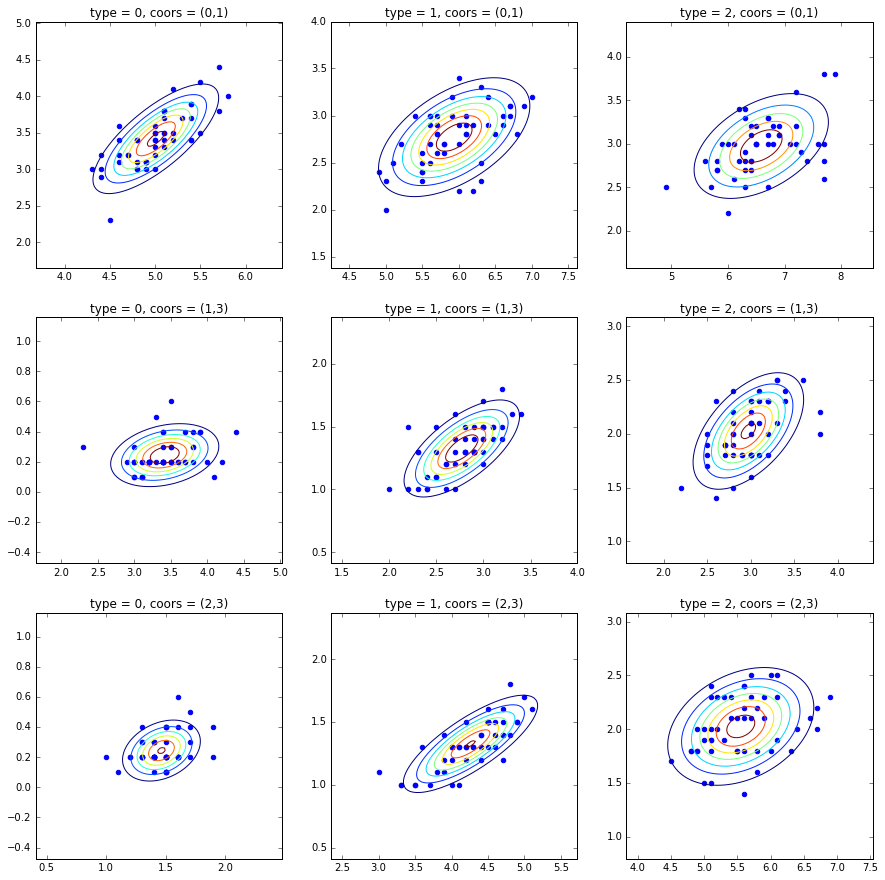

In [4]:
plt.figure(figsize=(15, 15))
for i in range(3):
    for iris_type in [0, 1, 2]:
        build_density([(0, 1), (1, 3), (2, 3)][i], iris_type, iris_type + i*3)
plt.show()

–û—Ü–µ–Ω–∏–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ P(ùëá = ùëò) —á–∞—Å—Ç–æ—Ç–∞–º–∏ –≤—Ö–æ–∂–¥–µ–Ω–∏–π ùëò-—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å–º–µ—Å–∏ –≤ –¥–∞–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É

In [5]:
print np.array([float(len(iris[i])) for i in (0, 1, 2)]) / len(data.target)

[ 0.33333333  0.33333333  0.33333333]


–í—Å–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã —Å–º–µ—Å–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–Ω–æ. –ó–Ω–∞—á–∏—Ç, –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –æ—Ç—Ä–∏—Ü–∞–Ω–∏—è –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –º–µ–∂–¥—É –¥–≤—É–º—è –¥—Ä—É–≥–∏–º–∏. 

–í—ã—á–∏—Å–ª–∏–º —É—Å–ª–æ–≤–Ω–æ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ $E(ùëã \mid ùëá \ne ùëò)$ –¥–ª—è –≤—Å–µ—Ö ùëò = 1, 2, 3 (—Ç—Ä–∏ 4-–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–∞). 

In [6]:
exp_est = np.zeros(12).reshape(3, 4)
for i in range(3):
    ar = iris[i]
    exp_est[i] = np.mean(ar, axis=0)
exp_cond = [(exp_est[1] + exp_est[2]) / 2, (exp_est[0] + exp_est[2]) / 2, (exp_est[0] + exp_est[1]) / 2]

for i in range(3):
    print 'E(X|T != ' + str(i) +') = ' + str(exp_cond[i])

E(X|T != 0) = [ 6.262  2.872  4.906  1.676]
E(X|T != 1) = [ 5.797  3.196  3.508  1.135]
E(X|T != 2) = [ 5.471  3.094  2.862  0.785]


–î–ª—è –ø–∞—Ä –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0, 1), (1, 3) –∏ (2, 3) –ø–æ—Å—Ç—Ä–æ–π–º –≥—Ä–∞—Ñ–∏–∫–∏ —É—Å–ª–æ–≤–Ω–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ $p(ùëã \mid ùêº\{T \ne ùëò\})(x \mid 1)$ (9 —à—Ç—É–∫).

In [7]:
def build_cond_density(coors, iris_type):
    #–∏–∑–≤–ª–µ–∫–∞–µ–º –Ω—É–∂–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã
    cur_types = range(3)
    cur_types.remove(iris_type)
    pairs = np.array([[iris[cur_types[0]].transpose()[coors[0]],
                       iris[cur_types[0]].transpose()[coors[1]]],
                      [iris[cur_types[1]].transpose()[coors[0]],
                       iris[cur_types[1]].transpose()[coors[1]]]])

    #–∏—â–µ–º (–æ—Ü–µ–Ω–∏–≤–∞–µ–º) –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è
    a_est = [[pairs[0][0].mean(), pairs[0][1].mean()], 
             [pairs[1][0].mean(), pairs[1][1].mean()]]
    sigma_est = np.zeros(8).reshape(2, 2, 2)
    for i in range(2):
        for j in range(2):
            sigma_est[0][i][j] = np.mean(pairs[0][i] * pairs[0][j]) - np.mean(pairs[0][i]) * np.mean(pairs[0][j])
            sigma_est[1][i][j] = np.mean(pairs[1][i] * pairs[1][j]) - np.mean(pairs[1][i]) * np.mean(pairs[1][j])

    #—Å—á–∏—Ç–∞–µ–º –ø–ª–æ—Ç–Ω–æ—Å—Ç—å
    grid = np.mgrid[left:right:0.05, left:right:0.05]
    size = grid[0].shape[0]
    density = np.zeros(size**2).reshape(size, size)
    for i in range(size):
        for j in range(size):
            density[i][j] = (sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=a_est[0], cov=sigma_est[0]) + \
                             sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=a_est[1], cov=sigma_est[1])) \
                             / 2.
    
    #—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
    plt.figure(figsize=(7, 7))
    plt.contour(grid[0], grid[1], density)  # –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å —É–∫–∞–∑–∞–Ω–Ω—ã–µ –ª–∏–Ω–∏–∏ —É—Ä–æ–≤–Ω—è
    plt.title('type = ' + str(iris_type) + ', coors = (' + str(coors[0]) + ',' + str(coors[1]) + ')')
    plt.show()

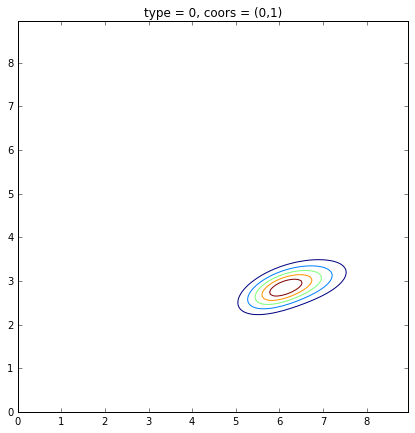

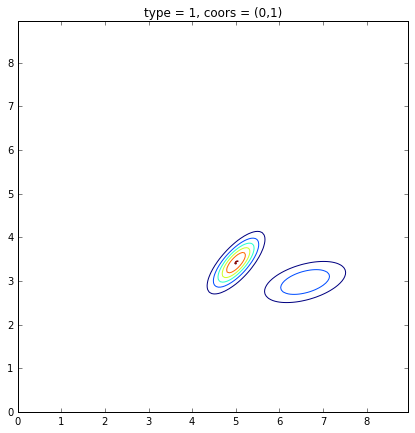

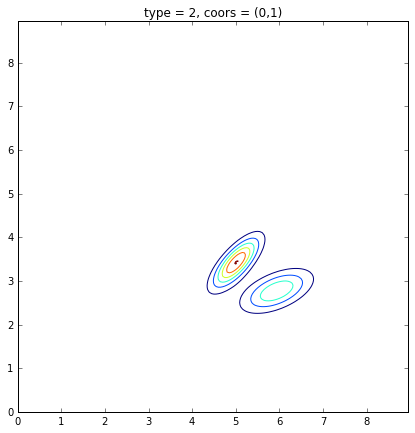

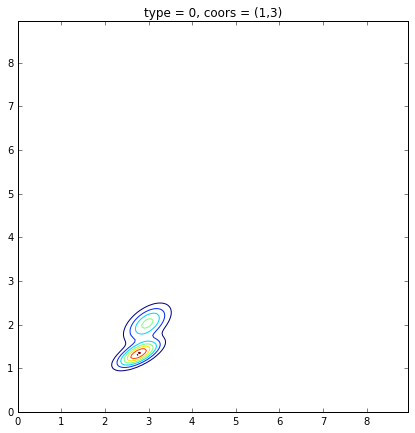

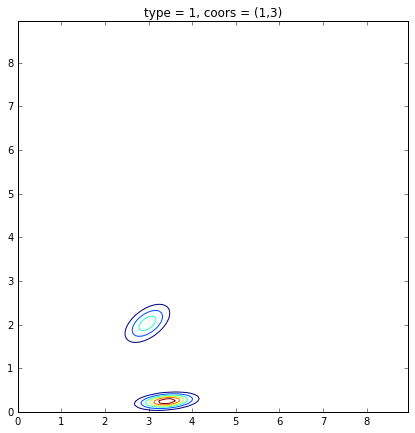

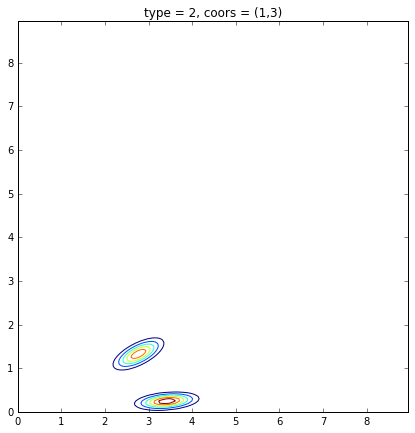

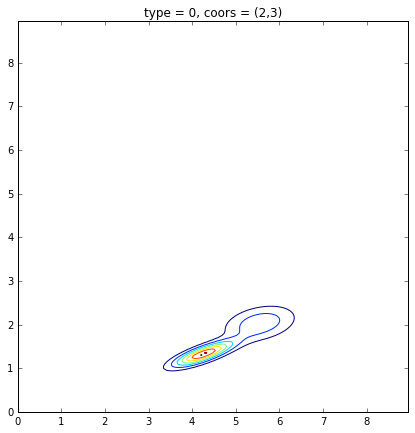

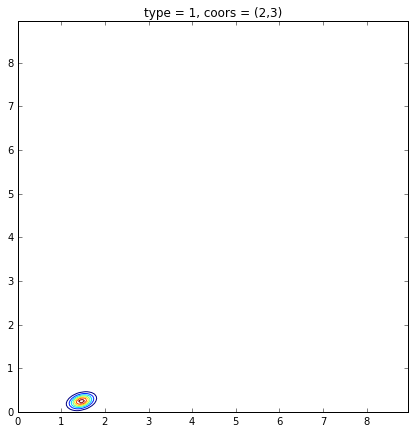

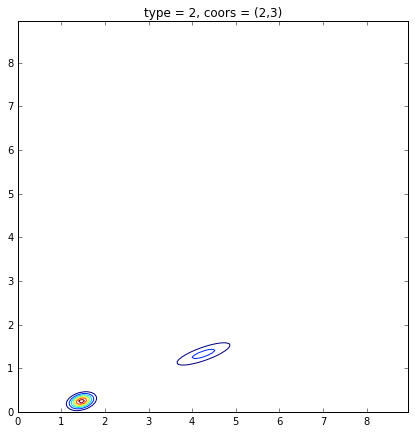

In [8]:
for coors in [(0, 1), (1, 3), (2, 3)]:
    for iris_type in [0, 1, 2]:
        build_cond_density(coors, iris_type)

–ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º –≤—Å–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ 4-–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É $ùëò = \underset{k}{\operatorname{argmax}} p(ùëã \mid ùêº\{ùëá = ùëò\})(x \mid 1)$ (–∑–¥–µ—Å—å —É—Å–ª–æ–≤–Ω–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ—Ü–µ–Ω–æ–∫ –¥–ª—è 4-–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤).

In [9]:
#–∏—â–µ–º –æ—Ü–µ–Ω–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞

a_ests = np.zeros(3*4).reshape(3, 4) # —Ç–∏–ø, –æ—Ü–µ–Ω–∫–∞ –º–∞—Ç –æ–∂–∏–¥–∞–Ω–∏—è
sigma_ests = np.zeros(3*4*4).reshape(3, 4, 4) # —Ç–∏–ø, –æ—Ü–µ–Ω–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π
for iris_type in [0, 1, 2]:    
    #–∏—â–µ–º (–æ—Ü–µ–Ω–∏–≤–∞–µ–º) –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è
    cur_iris_ar = iris[iris_type].transpose()
    a_est = cur_iris_ar.mean(axis=1)
    sigma_est = np.zeros(4*4).reshape(4, 4)
    for i in range(4):
        for j in range(4):
            sigma_est[i][j] = np.mean(cur_iris_ar[i] * cur_iris_ar[j]) - \
                              np.mean(cur_iris_ar[i]) * np.mean(cur_iris_ar[j])

    a_ests[iris_type] = a_est
    sigma_ests[iris_type] = sigma_est
    
#—Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–∏–ø–∞ —Ç–æ—á–∫–∏
def iris_pred_type(point):
    p = [0., 0., 0.]
    for iris_type in [0, 1, 2]:
        mean = a_ests[iris_type]
        cov = sigma_ests[iris_type]
        p[iris_type] = sps.multivariate_normal.pdf(point, mean=mean, cov=cov)
    return p.index(max(p))

–ü–æ—Å—á–∏—Ç–∞–µ–º –¥–æ–ª—é –æ—à–∏–±–æ–∫ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ

In [10]:
mistakes_cnt = 0
for iris_type in [0, 1, 2]:
    for point in iris[iris_type]:
        prediction = iris_pred_type(point)
        if prediction != iris_type:
            mistakes_cnt += 1
print '–î–æ–ª—è –æ—à–∏–±–æ–∫ = ' + str(mistakes_cnt / float(len(data.target)))

–î–æ–ª—è –æ—à–∏–±–æ–∫ = 0.02


–ù–∞—Ä–∏—Å—É–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –≤—Å–µ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤ –ø—Ä–æ–µ–∫—Ü–∏–∏ –Ω–∞ –ø–∞—Ä—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0, 1), (1, 3) –∏ (2, 3), –≥–¥–µ –∑–∞–∫—Ä–∞—Å–∏–º —Ä–∞–∑–Ω—ã–º–∏ —Ü–≤–µ—Ç–∞–º–∏ –æ–±–ª–∞—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


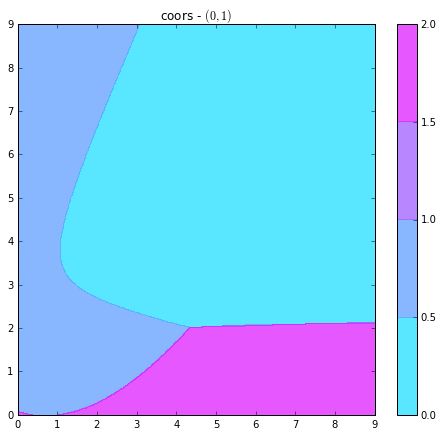

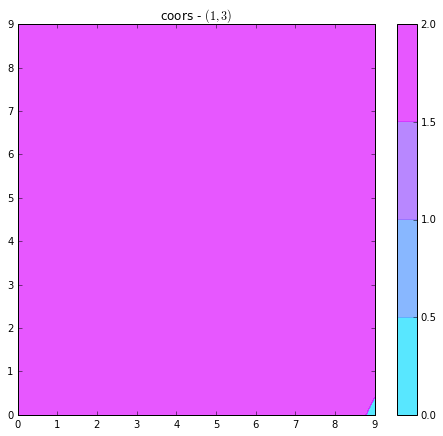

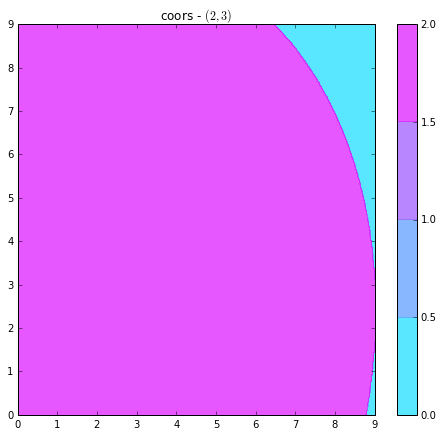

In [11]:
for coors in [(0, 1), (1, 3), (2, 3)]:
    #–ø–æ–ª—É—á–∞–µ–º —Å–µ—Ç–∫—É –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è
    grid_x = np.linspace(left,right,500)
    grid_y = np.linspace(left,right,500)
    x_for_plot, y_for_plot = np.meshgrid(grid_x, grid_y)
    
    #—Å—á–∏—Ç–∞–µ–º —Ç–∏–ø –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏
    pred_type_ar = np.arange(500*500).reshape(500,500)
    for i in range(len(grid_x)):
        for j in range(len(grid_y)):
            point = [0, 0, 0, 0]
            point[coors[0]] = grid_x[i]
            point[coors[1]] = grid_y[j]
            pred_type_ar[i][j] = iris_pred_type(point)
            
    #—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
    plt.figure(figsize=(8, 7))        
    CS = plt.contourf(x_for_plot, y_for_plot, pred_type_ar, 3, alpha=.75, cmap='cool')
    plt.colorbar(CS, shrink=1)
    plt.title(r'coors - $' + str(coors) + '$')
    plt.legend()
    plt.show()